# Week 3
# An End-To-End Machine Learning Project

## Get the Data

Let's use a preprocessed version of the California housing dataset provided by the textbook ([link](https://github.com/ageron/handson-ml2/blob/master/datasets/housing/housing.csv)).
- Download the data
- Take a quick look at the data structure
- Create a training set and a test set

[Original dataset](https://www.kaggle.com/datasets/camnugent/california-housing-prices)

[Complete project notebook](https://github.com/ageron/handson-ml2/blob/master/02_end_to_end_machine_learning_project.ipynb)

*Reading: Chapter 2*

In [ ]:
# Import three key libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
import urllib # For downloading the data file from the internet
housing_url = 'https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.tgz'
urllib.request.urlretrieve(housing_url, 'housing.tgz')

('housing.tgz', <http.client.HTTPMessage at 0x79c74602b730>)

In [ ]:
import tarfile # Extract files from a compressed .tgz file
housing_tgz = tarfile.open('housing.tgz')
housing_tgz.extractall()
housing_tgz.close()

In [ ]:
housing = pd.read_csv('housing.csv')
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [ ]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


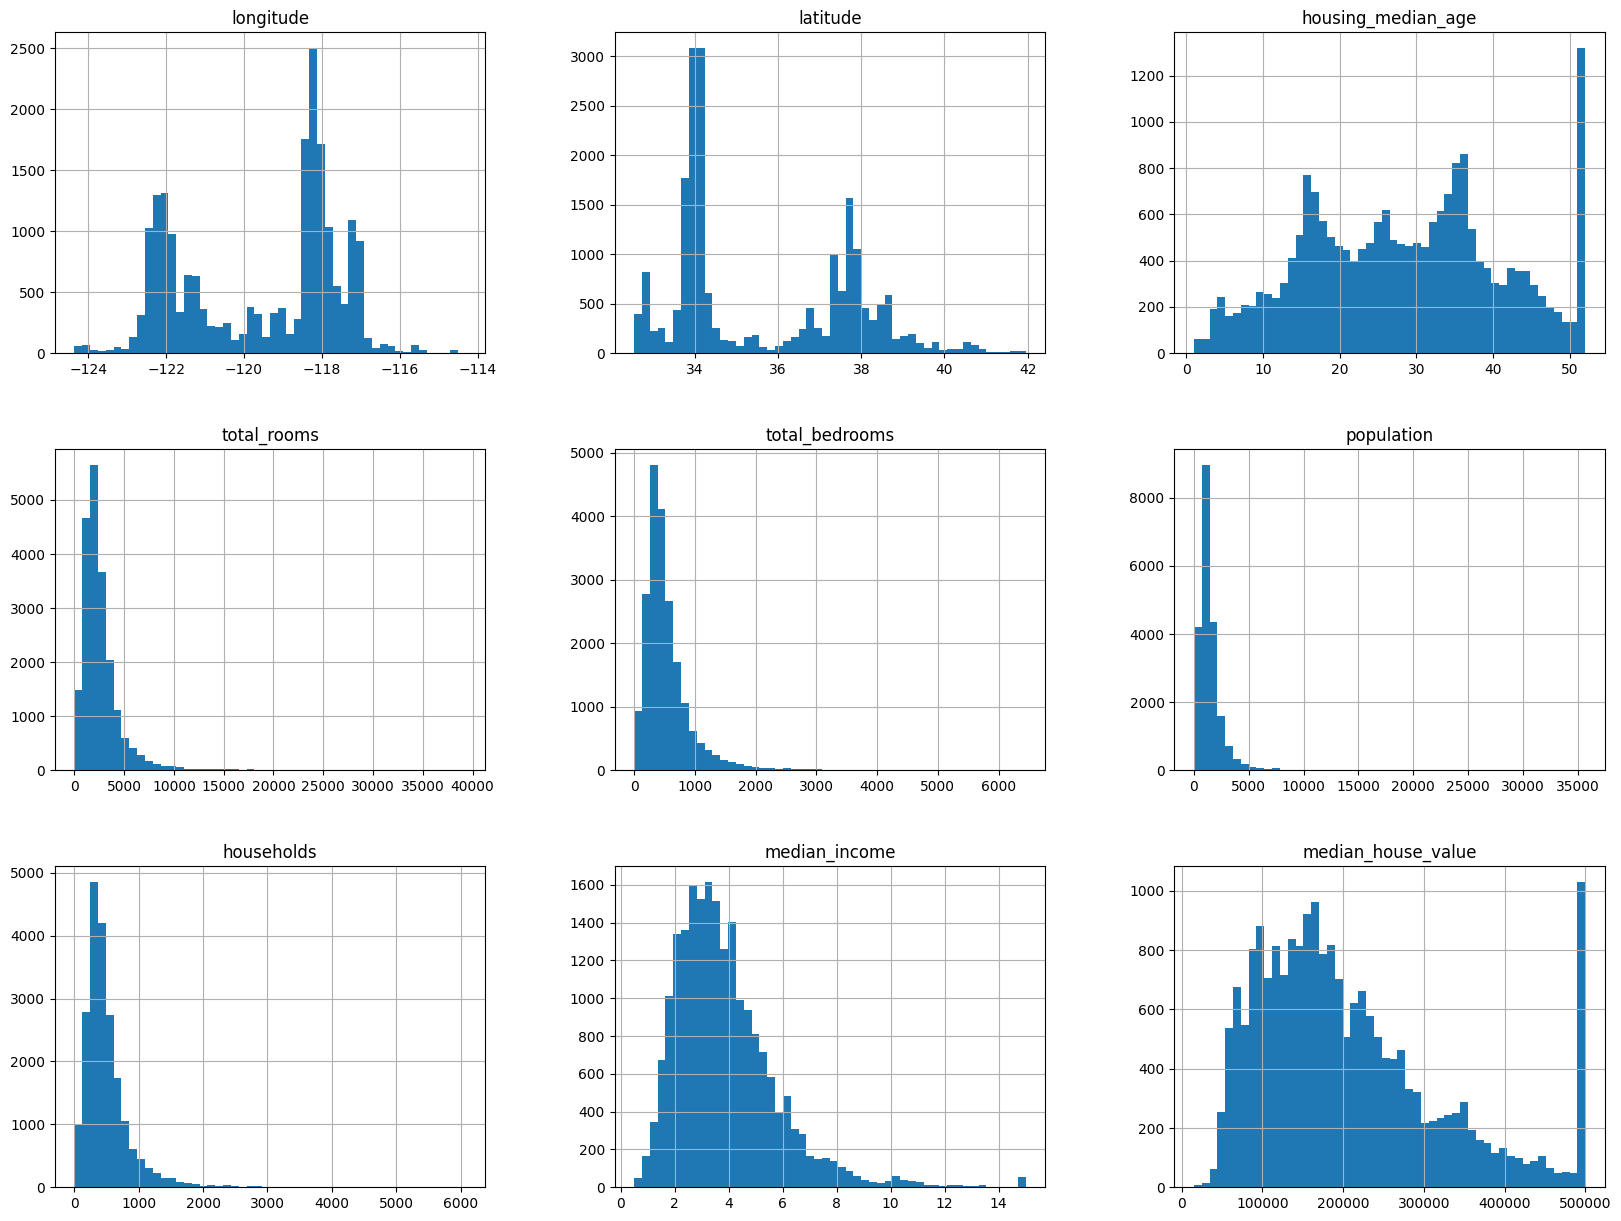

In [ ]:
housing.hist(bins=50, figsize=(20,15))
plt.show()

Observations from the histograms:
1. The median income is not expressed in US dollars. The income data has been scaled and capped at 0.5 and 15.0.
2. The median age and median value are also capped.
3. These attributes have very different scales. Attributes with a small scale may be ignored by the machine learning model.
4. Many histograms are not symmetric. The distribution of data tends to be tail heavy.

### Create a Test Set

In [ ]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2)

In [ ]:
len(train_set), len(test_set)

(16512, 4128)

## Discover and Visualize the Data to Gain Insights
- Put the test set aside until the prediction model has been built.
- Examine the prediction power of each attribute.

In [ ]:
# Create a copy so that our explorations won't harm the training set.
housing = train_set.copy()

### Visualizing Geographical Data
Since there is geographical information (latitude and longitude), it is a good idea to create a scatter plot of all districts.

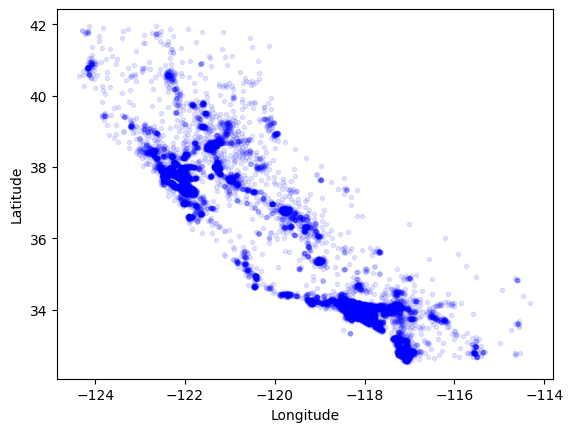

In [ ]:
# Visualize all districts
plt.plot(housing['longitude'], housing['latitude'], 'b.', alpha=0.1)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

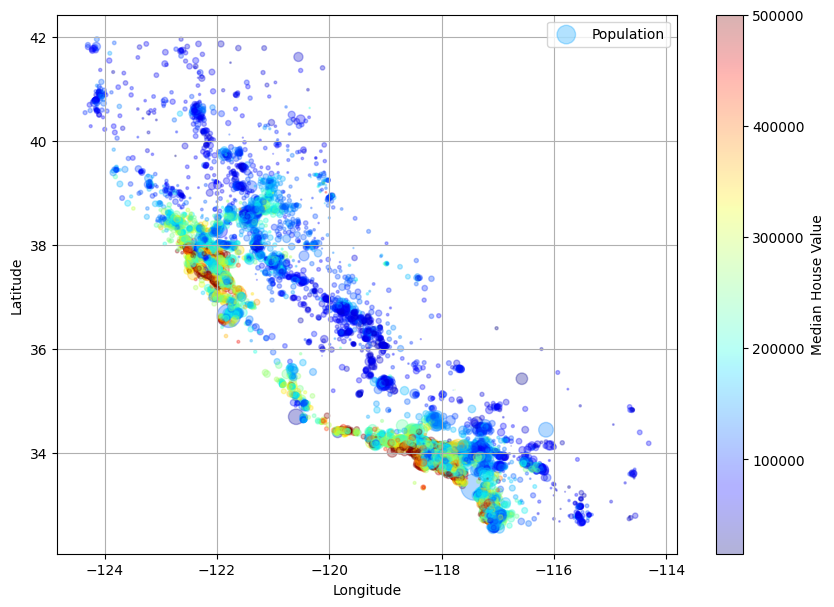

In [ ]:
# Improve the visualization: use color to reflect the median house value
plt.figure(figsize=(10, 7))
plt.scatter(housing['longitude'], housing['latitude'],
            s=housing['population']/100,
            c=housing['median_house_value'],
            label='Population',
            alpha=0.3,
            cmap='jet')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Median House Value')
plt.grid(True)
plt.legend()
plt.show()

**Observations:**
- The housing prices are very much related to the location: houses that are close to the ocean tend to be more expensive.
- The housing prices are also related to the population density: houses in large cities tend to be more expensive.
- There are exceptions: houses near Northern California coast are quite affordable.

### Explore Correlations

One way to check for correlation between house values and another attribute is to create a scatter plot.

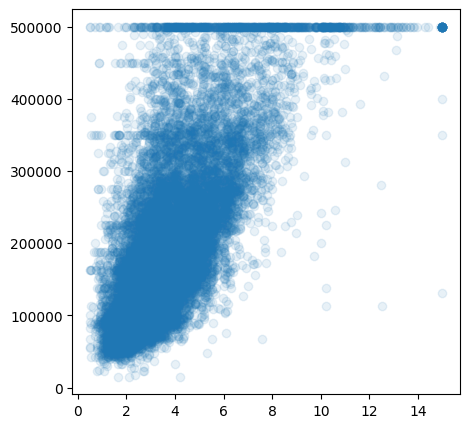

In [ ]:
# Median Income vs. House Value
plt.figure(figsize=(5, 5))
plt.scatter(housing['median_income'], housing['median_house_value'], alpha=0.1)
plt.show()

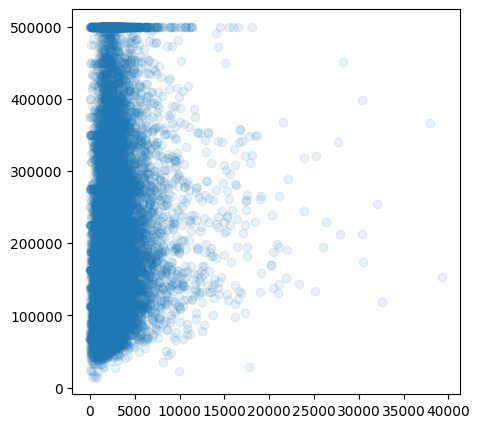

In [ ]:
# Number of Rooms vs. House Value
plt.figure(figsize=(5, 5))
plt.scatter(housing['total_rooms'], housing['median_house_value'], alpha=0.1)
plt.show()

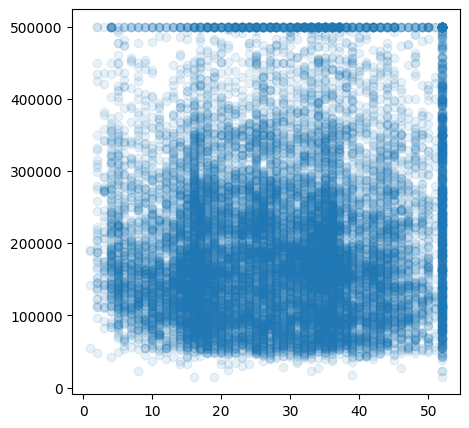

In [ ]:
# House Age vs. House Value
plt.figure(figsize=(5, 5))
plt.scatter(housing['housing_median_age'], housing['median_house_value'], alpha=0.1)
plt.show()

**Observations:**
- Scatter plots can reveal direct correlations.
- Scatter plots is not very helpful in revealing complicated correlations.

### Construct New Attributes

Sometimes, we can create useful attributes by combining several existing attributes. For example, the total number of rooms in a district is not very useful, but the average number of rooms per house is useful.

In [ ]:
# Create three new attributes.
housing["rooms_per_house"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_ratio"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["people_per_house"] = housing["population"] / housing["households"]

In [ ]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_house,bedrooms_ratio,people_per_house
19322,-123.00,38.51,33.0,1565.0,390.0,759.0,311.0,2.6726,153100.0,NEAR OCEAN,5.032154,0.249201,2.440514
8066,-118.17,33.83,46.0,1362.0,214.0,531.0,222.0,4.3125,290500.0,NEAR OCEAN,6.135135,0.157122,2.391892
5395,-118.37,34.04,25.0,542.0,161.0,442.0,131.0,2.2500,333300.0,<1H OCEAN,4.137405,0.297048,3.374046
11147,-117.98,33.84,35.0,984.0,179.0,661.0,199.0,5.0747,189600.0,<1H OCEAN,4.944724,0.181911,3.321608
15339,-117.31,33.18,16.0,1835.0,430.0,599.0,399.0,2.0147,87700.0,NEAR OCEAN,4.598997,0.234332,1.501253


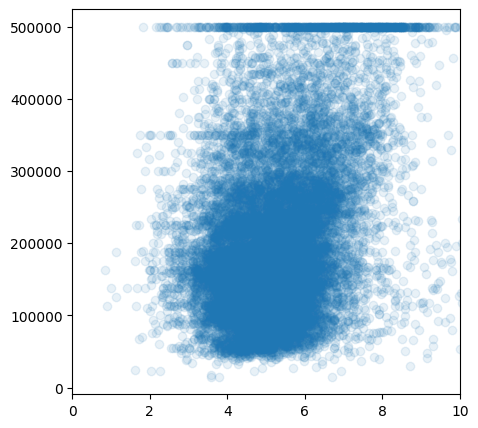

In [ ]:
plt.figure(figsize=(5, 5))
plt.scatter(housing['rooms_per_house'], housing['median_house_value'], alpha=0.1)
plt.xlim(0, 10)
plt.show()

## Prepare the Data for Machine Learning
It's time to prepare the data for training a machine learning model:
- Handle incomplete records
- Convert text and categorical attributes to numerical attributes
- Balance the scales of the attributes
- Normalize the distribution of each attribute
- Build a data processing pipeline so that it can be applied directly to the test set.

In [ ]:
# Start with the original training set
housing = train_set.drop("median_house_value", axis=1)
housing_labels = train_set["median_house_value"].copy()

### Handle Incomplete Records
Most machine learning models cannot work with missing features. If there are incomplete records in the dataset, then we need to either remove them or make informed guesses on the missing values (imputation).

In [ ]:
# Check for missing values
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        175
population              0
households              0
median_income           0
ocean_proximity         0
dtype: int64

In [ ]:
# Use the median value to fill the empty cells
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
housing_num = housing.select_dtypes(include=[np.number])
imputer.fit(housing_num)
imputer.statistics_

array([-118.5    ,   34.26   ,   29.     , 2129.     ,  435.     ,
       1165.     ,  409.     ,    3.54025])

In [ ]:
X = imputer.transform(housing_num)

# Recreate the data frame
housing_transformed = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing_num.index)

In [ ]:
housing_transformed.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64

In [ ]:
# Handle the categorical feature `ocean_proximity`
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(8)

,ocean_proximity
19322,NEAR OCEAN
8066,NEAR OCEAN
5395,<1H OCEAN
11147,<1H OCEAN
15339,NEAR OCEAN
8039,<1H OCEAN
16470,INLAND
7335,<1H OCEAN


In [ ]:
housing['ocean_proximity'].value_counts()

It may be tempting to assign a single number to each type of proximity, such as
- 1: <1H OCEAN
- 2: INLAND
- 3: Near OCEAN
- 4: NEAR BAY
- 5: ISLAND

However, this is not a good approach as it introduces an "order" that should not exist. For example, it implies that the difference between "INLAND" and "Near OCEAN" is smaller than the difference between "INLAND" and "ISLAND".

To fix this issue, a common solution is to create one binary attribute for each category:
- [1, 0, 0, 0, 0]: <1H OCEAN
- [0, 1, 0, 0, 0]: INLAND
- [0, 0, 1, 0, 0]: Near OCEAN
- [0, 0, 0, 1, 0]: NEAR BAY
- [0, 0, 0, 0, 1]: ISLAND

This is called **one-hot encoding**, because only one attribute will be 1 (hot), and the others will be 0 (cold).

In [ ]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder(sparse_output=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

In [ ]:
housing_cat_1hot[:5, :]

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

In [ ]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [ ]:
# Add the one-hot vectors to the dataset.

### Feature Scaling
One of the most important transformations we need to apply to the dataset is **feature scaling**. With few exception, machine learning models don't perform well when the input numerical attributes have very different scales.

A common way to perform feature scaling is **standard scaling**: values are converted to a number that reflects how many **standard deviations** away from the **mean**. Recall that:
- The mean value is the average of all values in a group.
- The standard deviation describes how different values are within a group.

If we use $x_1, x_2, ..., x_n$ to represent all $n$ values in the group, then
- Mean: $\bar{x} = \frac{\sum_{i=1}^n x_i}{n} = \frac{x_1+x_2+\cdots+x_n}{n}$
- Variance: $Var(x) = \frac{\sum_{i=1}^n(x_i - \bar{x})^2}{n}$
- Standard Deviation: $\sigma = \sqrt{Var(x)}$
- Standard Scaling $x \rightarrow \frac{x - \bar{x}}{\sigma}$

In [ ]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
housing_num_std_scaled = std_scaler.fit_transform(housing_num)

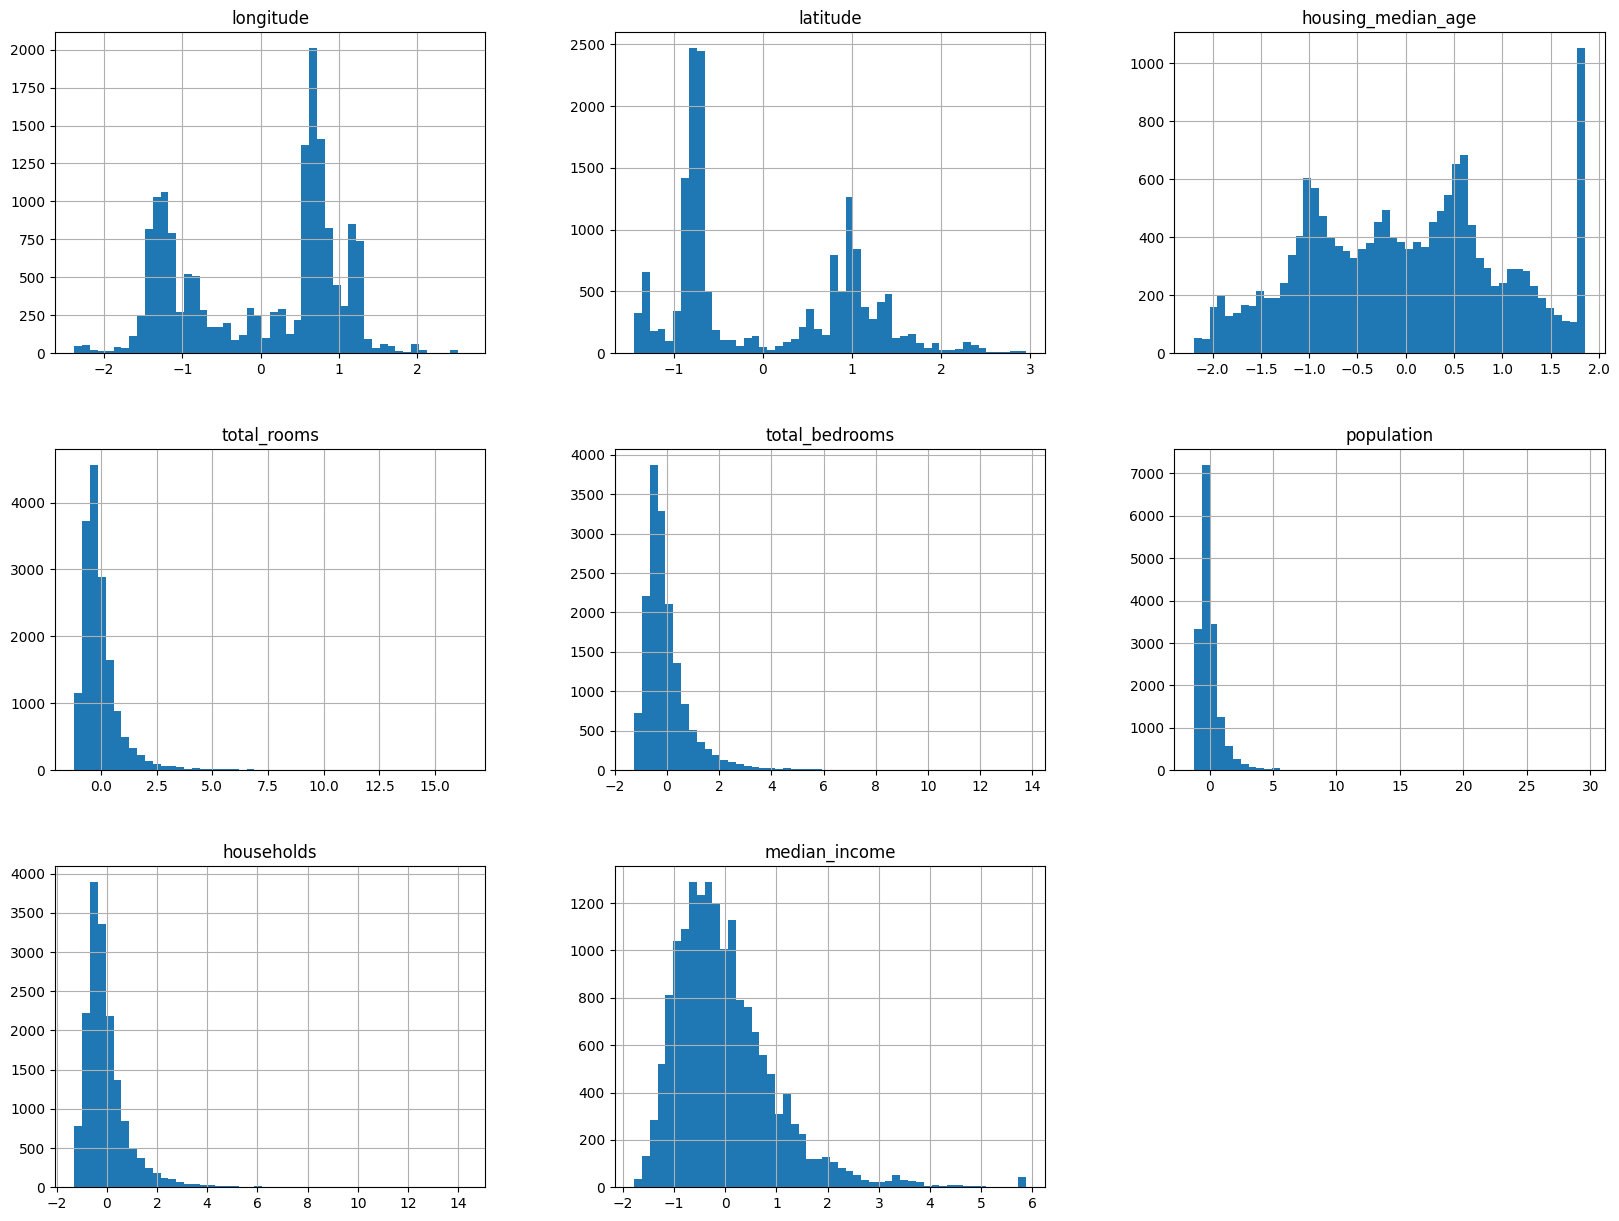

In [ ]:
# Before vs. after
after = pd.DataFrame(housing_num_std_scaled, columns=housing_num.columns)
after.hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
after.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-1.705832,1.341834,0.348976,-0.487754,-0.352677,-0.580941,-0.491846,-0.634947
1,0.699960,-0.843287,1.382401,-0.578463,-0.762291,-0.778020,-0.720007,0.229876
2,0.600341,-0.745237,-0.286977,-0.944873,-0.885640,-0.854950,-0.953294,-0.857811
3,0.794598,-0.838618,0.507965,-0.747369,-0.843748,-0.665650,-0.778969,0.631832
4,1.128321,-1.146777,-1.002425,-0.367106,-0.259583,-0.719242,-0.266249,-0.981900


### Build a Transformation Pipeline
We can use `sklearn.pipeline.Pipeline` class to represent all the above transformations. It helps us to avoid repeating the same tedious process in transforming the test set.

In [ ]:
# First, we need to create a class representing the actions for creating new attributes.
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity'],
      dtype='object')

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
        return np.c_[X, rooms_per_household, population_per_household,
                        bedrooms_per_room]

In [ ]:
# Experiment on the training set
attr_adder = CombinedAttributesAdder()
temp_array = attr_adder.transform(housing.values)
temp_df = pd.DataFrame(temp_array,
                       columns=list(housing.columns) + ['rooms_per_household',
                                                        'population_per_household',
                                                        'bedrooms_per_room'])
temp_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household,bedrooms_per_room
0,-123.0,38.51,33.0,1565.0,390.0,759.0,311.0,2.6726,NEAR OCEAN,5.032154,2.440514,0.249201
1,-118.17,33.83,46.0,1362.0,214.0,531.0,222.0,4.3125,NEAR OCEAN,6.135135,2.391892,0.157122
2,-118.37,34.04,25.0,542.0,161.0,442.0,131.0,2.25,<1H OCEAN,4.137405,3.374046,0.297048
3,-117.98,33.84,35.0,984.0,179.0,661.0,199.0,5.0747,<1H OCEAN,4.944724,3.321608,0.181911
4,-117.31,33.18,16.0,1835.0,430.0,599.0,399.0,2.0147,NEAR OCEAN,4.598997,1.501253,0.234332


In [ ]:
# Build the transformation pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler())
])

In [ ]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ['ocean_proximity']

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OneHotEncoder(), cat_attribs)
])

In [ ]:
housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared[:3, :]

array([[-1.70583245,  1.34183375,  0.34897627, -0.48775354, -0.35180476,
        -0.58094129, -0.49184619, -0.63494743, -0.16928165, -0.05672998,
         0.53868295,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ],
       [ 0.6999601 , -0.84328748,  1.38240088, -0.57846254, -0.76347226,
        -0.77801976, -0.72000651,  0.22987593,  0.30499625, -0.0611867 ,
        -0.85964093,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ],
       [ 0.60034136, -0.74523717, -0.28697734, -0.94487329, -0.88744031,
        -0.85494951, -0.95329404, -0.85781124, -0.55402092,  0.02883692,
         1.26528602,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ]])

In [ ]:
test_prepared = full_pipeline.transform(test_set)
test_prepared[:3, :]

array([[ 0.62026511, -0.77325155,  0.74644727,  0.18161634,  0.5978373 ,
         0.62400341,  0.55922947, -1.07023325, -0.50635077, -0.00671916,
         0.70078906,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [-0.93378722,  1.34650282,  0.66695307, -0.42519561, -0.50384106,
        -0.5221635 , -0.4533922 , -0.65804595, -0.08418232, -0.04790361,
        -0.35099948,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.6451698 , -0.68453936, -0.52545994,  0.00332623,  0.25867942,
         0.10537585,  0.32337835, -0.12720188, -0.51192876, -0.05411916,
         0.46530527,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ]])

## Exercise: Data Transform on Test Set

Without using the transform pipeline developed in class, apply each individual transformations to the test set:
- Use `SimpleImputer` to fill any missing values with the median value.
- Apply `OneHotEncoder` to the "ocean_proximity" column.
- Create three new features:
    - Rooms per house
    - The ratio between "total_bedrooms" and "total_rooms"
    - People per house
- Apply `StandardScaler` to get all attributes to the same scale.

When all transforms are applied to the test set, display the first 3 rows.